# Cox Proportional Hazards Model
### $h(t) = h_0(t)exp(\beta_1x_1 + ... + \beta_px_p)$

#### $t$ - survival time

#### $h(t)$ - the hazard function

#### $x_1,...x_p$ - covariates

#### $\beta_1,...\beta_p$ - measures of covariate impact


The value $exp(\beta_i)$ is called the hazard ratio (HR). An HR greater than 1 indicates that as the value of the ith covariate increases, the event hazard increases, and thus the duration of survival decreases.


#### Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
%matplotlib inline

#### Read in dataset and fit CPH Model

In [4]:
data = pd.read_csv('data/lung.csv').drop("Unnamed: 0", axis=1).dropna()
print(data.shape)
data.head()

(167, 10)


,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


In [5]:
# Replace status with 1's and 0's
data['status'].replace({1:0, 2:1}, inplace=True)
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0


In [7]:
# Fit cph model
cph = CoxPHFitter()

cph.fit(df=data,
        duration_col="time",
        event_col="status")

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -491.27
         time fit was run = 2022-06-03 18:18:12 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
inst       -0.03       0.97       0.01            -0.06            -0.00                 0.95                 1.00
age         0.01       1.01       0.01            -0.01             0.04                 0.99                 1.04
sex        -0.57       0.57       0.20            -0.96            -0.17                 0.38                 0.84
ph.ecog     0.91       2.48       0.24             0.44             1.38                 1.55                 3.96
ph.karno    0.03       1.03       0.01             0.00             0.05                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.02       0.98       0.01            -0.03            -0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
inst          0.00 -2.31   0.02       5.60
age           0.00  1.07   0.28       1.82
sex           0.00 -2.81 <0.005       7.68
ph.ecog       0.00  3.80 <0.005      12.77
ph.karno      0.00  2.29   0.02       5.49
pat.karno     0.00 -1.34   0.18       2.47
meal.cal      0.00  0.01   0.99       0.01
wt.loss       0.00 -2.11   0.03       4.85
---
Concordance = 0.65
Partial AIC = 998.54
log-likelihood ratio test = 33.70 on 8 df
-log2(p) of ll-ratio test = 14.41

#### Compare predicted survival curves for a randomly chosen male and female

In [11]:
data_male = data[data['sex']==1].sample(1)
data_female = data[data['sex']==2].sample(1)
data_female

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
179,7.0,269,0,74,2,0.0,100.0,100.0,588.0,0.0


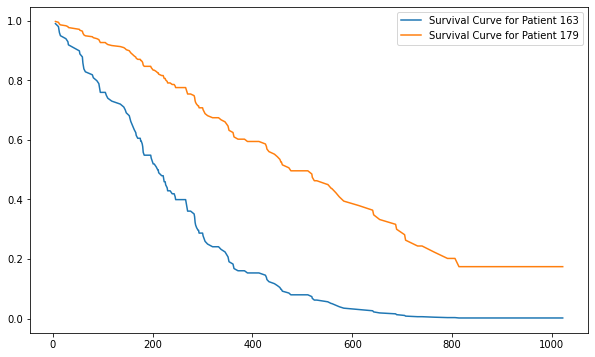

In [20]:
male_patient_survival = cph.predict_survival_function(data_male)
female_patient_survival = cph.predict_survival_function(data_female)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(male_patient_survival, label=f'Survival Curve for Patient {data_male.index[0]}')
ax.plot(female_patient_survival, label=f'Survival Curve for Patient {data_female.index[0]}')
ax.legend()

#### Evaluate model fit

In [29]:
data['median_preds'] = cph.predict_median(data)
data['mean_preds'] = cph.predict_expectation(data)
data

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,median_preds,mean_preds
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0,433.0,462.591690
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0,210.0,226.650665
5,12.0,1022,0,74,1,1.0,50.0,80.0,513.0,0.0,429.0,461.150303
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0,222.0,242.196911
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0,286.0,320.975017
...,...,...,...,...,...,...,...,...,...,...,...,...
221,11.0,203,0,71,2,1.0,80.0,90.0,1025.0,0.0,371.0,431.237237
224,13.0,191,0,39,1,0.0,90.0,90.0,2350.0,-5.0,550.0,553.026767
225,32.0,105,0,75,2,2.0,60.0,70.0,1025.0,5.0,428.0,450.951863
226,6.0,174,0,66,1,1.0,90.0,100.0,1075.0,1.0,229.0,257.365442


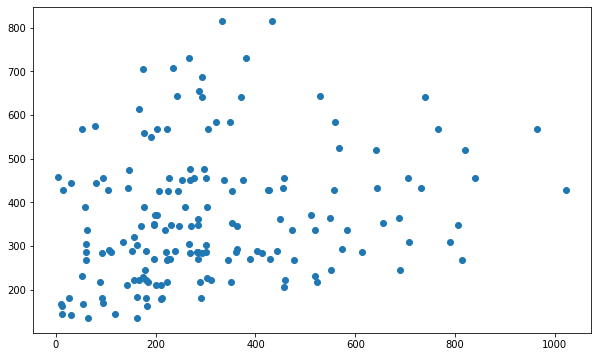

In [32]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(data['time'], data['median_preds'])